In [1]:
import geopandas as gpd
import os
import sys
import matplotlib.pyplot as plt

In [2]:
# sys.path.insert(0, os.path.abspath(os.path.join(os.getcwd(), '..')))
abspath = os.path.abspath(os.path.join(os.getcwd(), '..'))

tribal_folder = os.path.join(abspath, 'tl_2020_us_aitsn/')
tribal_file = 'tl_2020_us_aitsn.shp'
tribal_path = os.path.join(tribal_folder, tribal_file)

EJI_folder = os.path.join(abspath, 'EJI_US/United States.gdb/')
EJI_file = 'a00000009.gdbtable'
EJI_path = os.path.join(EJI_folder, EJI_file)

tribal_WA_folder = os.path.join(abspath, 'Tribal_Lands_WA/')
tribal_WA_file = 'TribalLands.shp'
tribal_WA_path = os.path.join(tribal_WA_folder, tribal_WA_file)

WA_2020_folder = os.path.join(abspath, 'WA_tract_2020/')
WA_2020_file = 'tract20.shp'
WA_2020_path = os.path.join(WA_2020_folder, WA_2020_file)

WA_TL_folder = os.path.join(abspath, 'tl_2018_53_tract/')
WA_TL_file = 'tl_2018_53_tract.shp'
WA_TL_path = os.path.join(WA_TL_folder, WA_TL_file)

In [3]:
tribal_shapes = gpd.read_file(tribal_path)
tribal_shapes

DriverError: /Users/jphuong/CLAD_Geospatial/tl_2020_us_aitsn/tl_2020_us_aitsn.shp: No such file or directory

In [ ]:
print('Tribal Chapters:', sorted(tribal_shapes.NAME.unique().tolist()))

In [ ]:
tribal_shapes.columns
tribal_shapes.crs

In [ ]:
tribal_shapes.explore('GEOID')

## Washington State Tribal Lands

In [ ]:
tribal_WA_shapes = gpd.read_file(tribal_WA_path)
tribal_WA_shapes

In [ ]:
tribal_WA_shapes.crs

## EJI Shapes

In [ ]:
EJI_shapes = gpd.read_file(EJI_path)
EJI_shapes

In [ ]:
EJI_shapes.crs

In [ ]:
EJI_shapes_contiguous = EJI_shapes.to_crs("ESRI:102003")
tribal_shapes_contiguous = tribal_shapes.to_crs("ESRI:102003")
tribal_WA_contiguous = tribal_WA_shapes.to_crs("ESRI:102003")

In [ ]:
# plot interactive map
EJI_shapes.explore('GEOID')

## Washington State Census 2020
* Census tract

In [ ]:
WA_2020_shapes = gpd.read_file(WA_2020_path)
WA_2020_shapes

In [ ]:
WA_2020_shapes.crs

## Washington State TIGER/Line

In [ ]:
WA_TL_shapes = gpd.read_file(WA_TL_path)
WA_TL_shapes

In [ ]:
WA_TL_shapes.crs

## Plot Figures

In [ ]:
fig, ax = plt.subplots(figsize=(16, 16))
EJI_shapes.boundary.plot(ax=ax)
tribal_shapes.plot(ax=ax, column='GEOID')

fig, ax = plt.subplots(figsize=(16, 16))
EJI_shapes.boundary.plot(ax=ax, alpha=0.3, linewidth=0.2)
tribal_shapes.plot(ax=ax, color='red', alpha=0.5)
ax.set_title("WGS84 (lat/lon)")

### Overlay EJI and Census Tribal Lands

In [ ]:
figures_path = os.path.join(abspath, 'figures')

fig, ax = plt.subplots(figsize=(32, 32))
EJI_shapes_contiguous.boundary.plot(ax=ax, alpha=0.3, linewidth=0.2)
tribal_shapes_contiguous.plot(ax=ax, color='red', alpha=0.4)
ax.set_title("EJI (Blue) & Tribal Lands (Red)", fontsize=20)
# plt.savefig(os.path.join(figures_path, 'EJI_tribal_lands.tif'), bbox_inches='tight')
# plt.savefig(os.path.join(figures_path, 'EJI_tribalLands2.jpg'), bbox_inches='tight', dpi=300)

#### Add Buffer
* Fuzzy algorithm

### Overlay EJI and Washington State Tribal Lands
* Problem 1: EJI polygons not scaled to state
* Problem 2: WA tribal lands shape and census tract shapes are not scaled to match

In [ ]:
tribal_WA_contiguous = tribal_WA_shapes.to_crs("ESRI:102003")
WA_TL_contiguous = WA_TL_shapes.to_crs("ESRI:102003")
# WA_2020_contiguous = WA_2020_shapes.to_crs("ESRI:102003")

In [ ]:
figures_path = os.path.join(abspath, 'figures')

fig, ax = plt.subplots(figsize=(32, 32))
WA_TL_contiguous.boundary.plot(ax=ax, alpha=0.4, linewidth=0.3)
tribal_WA_contiguous.plot(ax=ax, color='red', alpha=0.3)
# ax.set_title("EJI (Blue) & Tribal Lands (Red)", fontsize=20)
# plt.savefig(os.path.join(figures_path, 'EJI_tribal_lands.tif'), bbox_inches='tight')
# plt.savefig(os.path.join(figures_path, 'EJI_tribalLands2.jpg'), bbox_inches='tight', dpi=300)

In [4]:
import numpy as np

In [5]:
print(os.getcwd())
print(os.path.join(os.getcwd(), '..', '..'))
os.listdir(os.path.join(os.getcwd(), '..', '..','Downloads','Federally_Recognized_Tribal_Lands'))

/Users/jphuong/CLAD_Geospatial/notebooks
/Users/jphuong/CLAD_Geospatial/notebooks/../..


['Federally_Recognized_Tribal_Lands.cpg',
 'Federally_Recognized_Tribal_Lands.shp',
 'Federally_Recognized_Tribal_Lands.shx',
 'Federally_Recognized_Tribal_Lands.xml',
 'Federally_Recognized_Tribal_Lands.dbf',
 'Federally_Recognized_Tribal_Lands.prj']

In [6]:
abspath = os.path.abspath(os.path.join(os.getcwd(), '..'))

# tribal_folder = os.path.join(abspath, 'tl_2020_us_aitsn/')
# tribal_file = 'tl_2020_us_aitsn.shp'
# tribal_path = os.path.join(tribal_folder, tribal_file)

# EJI_folder = os.path.join(abspath, 'EJI_US/United States.gdb/')
# EJI_file = 'a00000009.gdbtable'
# EJI_path = os.path.join(EJI_folder, EJI_file)

# tribal_WA_folder = os.path.join(abspath, 'Tribal_Lands_WA/')
# tribal_WA_file = 'TribalLands.shp'
# tribal_WA_path = os.path.join(tribal_WA_folder, tribal_WA_file)

# WA_2020_folder = os.path.join(abspath, 'WA_tract_2020/')
# WA_2020_file = 'tract20.shp'
# WA_2020_path = os.path.join(WA_2020_folder, WA_2020_file)

WA_TL_folder = os.path.join(abspath, 'tl_2018_53_tract/')
WA_TL_file = 'tl_2018_53_tract.shp'
WA_TL_path = os.path.join(WA_TL_folder, WA_TL_file)

<AxesSubplot:>

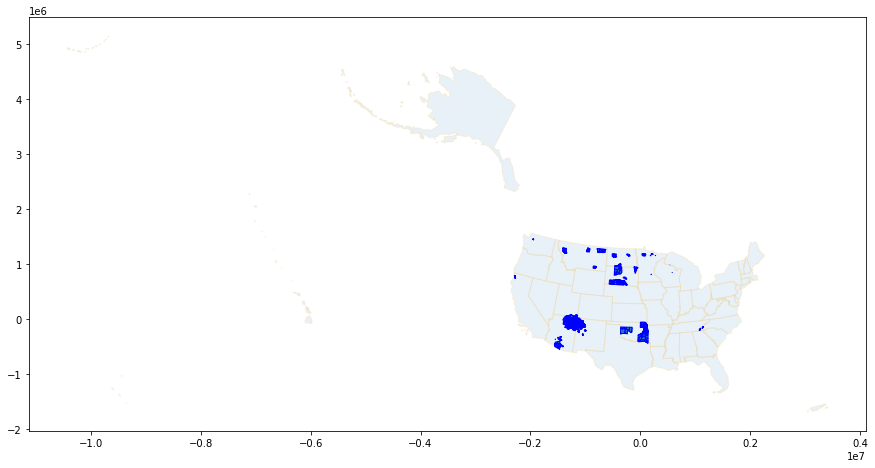

In [8]:
# fil1 = os.path.join(os.getcwd(), '..', '..','Downloads','Federally_Recognized_Tribal_Lands','Federally_Recognized_Tribal_Lands.shp')
# fedtribal = gpd.read_file(fil1).to_crs("ESRI:102003")

fil1 = os.path.join(os.getcwd(), '..', '..','Downloads','tl_2023_us_aitsn','tl_2023_us_aitsn.shp')
fedtribal = gpd.read_file(fil1).to_crs("ESRI:102003")

fil2 = os.path.join(os.getcwd(), '..', '..','Downloads','tl_2023_us_state','tl_2023_us_state.shp')
US_states = gpd.read_file(fil2).to_crs("ESRI:102003")

# WA_TL_path_ = gpd.read_file(WA_TL_path)

ax1 = fedtribal.plot(ec='blue', figsize=(15,15), zorder=1000)
US_states.plot(ax=ax1, ec='orange', alpha=0.1, zorder=1)

### Read in FCC Tribal Priority 2.5Hz areas

In [9]:
import zipfile
 
def decompZip(path_to_zip_file, directory_to_extract_to):
    with zipfile.ZipFile(path_to_zip_file, 'r') as zip_ref:
        zip_ref.extractall(directory_to_extract_to)
    zip_ref.close()
    

In [10]:
# locate the folder of FCC tribal areas
Tribal_P = os.path.join(os.getcwd(), '..', '..','Downloads','Tribal_Priority_2_5.zip')

# unzip the first-level zipfile
decompZip(Tribal_P, Tribal_P.rsplit('/',1)[0])

# include each tribal area
tribes = [x for x in os.listdir(Tribal_P.split('.zip')[0]) if x.endswith('.zip')]

# create memoized list of shapefile paths
shapefile_paths = []

# establish output folder
outdir = os.path.join(Tribal_P.split('.zip')[0], 'Shapefiles_unzipped')
if not os.path.exists(outdir):
    os.mkdir(outdir)

# iterate through each tribe zip file
for eachtribe in tribes:
    print('Start:{0}'.format(eachtribe))
    
    # decompress zip files
    decompZip(os.path.join(Tribal_P.split('.zip')[0], eachtribe), outdir)
    
    # append shapefile paths
    shapefile_paths.append(os.path.join(outdir, eachtribe.replace('.zip', '.shp')))
    print('End:{0}'.format(eachtribe))

Start:T3020R_Quartz_Valley_Reservation.zip
End:T3020R_Quartz_Valley_Reservation.zip
Start:T6550R_Grayling_ANVSA.zip
End:T6550R_Grayling_ANVSA.zip
Start:T5590R_Choctaw_OTSA.zip
End:T5590R_Choctaw_OTSA.zip
Start:T2685R_Paskenta_Rancheria.zip
End:T2685R_Paskenta_Rancheria.zip
Start:T4665R_Woodfords_Community.zip
End:T4665R_Woodfords_Community.zip
Start:T2240R_Miccosukee_Reservation.zip
End:T2240R_Miccosukee_Reservation.zip
Start:T1550R_Huron_Potawatomi_Reservation.zip
End:T1550R_Huron_Potawatomi_Reservation.zip
Start:T1860R_Lake_Traverse_Reservation.zip
End:T1860R_Lake_Traverse_Reservation.zip
Start:T0209800_Calista_Alaska_Native_Regional_Corporation.zip
End:T0209800_Calista_Alaska_Native_Regional_Corporation.zip
Start:T7070R_Nikolai_ANVSA.zip
End:T7070R_Nikolai_ANVSA.zip
Start:T7150R_Old_Harbor_ANVSA.zip
End:T7150R_Old_Harbor_ANVSA.zip
Start:T1530R_Houlton_Maliseet_Reservation.zip
End:T1530R_Houlton_Maliseet_Reservation.zip
Start:T3400R_San_Felipe_Pueblo.zip
End:T3400R_San_Felipe_Pueblo.

End:T5770R_Ottawa_OTSA.zip
Start:T6865R_Levelock_ANVSA.zip
End:T6865R_Levelock_ANVSA.zip
Start:T3040R_Quinault_Reservation.zip
End:T3040R_Quinault_Reservation.zip
Start:T7135R_Nunapitchuk_ANVSA.zip
End:T7135R_Nunapitchuk_ANVSA.zip
Start:T6855R_Larsen_Bay_ANVSA.zip
End:T6855R_Larsen_Bay_ANVSA.zip
Start:T7005R_Napaimute_ANVSA.zip
End:T7005R_Napaimute_ANVSA.zip
Start:T6915R_Marys_Igloo_ANVSA.zip
End:T6915R_Marys_Igloo_ANVSA.zip
Start:T7525R_Stony_River_ANVSA.zip
End:T7525R_Stony_River_ANVSA.zip
Start:T0815R_Cow_Creek_Reservation.zip
End:T0815R_Cow_Creek_Reservation.zip
Start:T5600R_Citizen_Potawatomi_Nation_Absentee_Shawnee_OTSA.zip
End:T5600R_Citizen_Potawatomi_Nation_Absentee_Shawnee_OTSA.zip
Start:T5950R_Kaw_Ponca_joint_use_OTSA.zip
End:T5950R_Kaw_Ponca_joint_use_OTSA.zip
Start:T1220R_Fort_McDowell_Yavapai_Nation_Reservation.zip
End:T1220R_Fort_McDowell_Yavapai_Nation_Reservation.zip
Start:T7745R_White_Mountain_ANVSA.zip
End:T7745R_White_Mountain_ANVSA.zip
Start:T0265R_Big_Sandy_Ranche

End:T5800R_Ponca_OTSA.zip
Start:T0206370_Bering_Straits_Alaska_Native_Regional_Corporation.zip
End:T0206370_Bering_Straits_Alaska_Native_Regional_Corporation.zip
Start:T2330R_Montgomery_Creek_Rancheria.zip
End:T2330R_Montgomery_Creek_Rancheria.zip
Start:T0217140_Cook_Inlet_Alaska_Native_Regional_Corporation.zip
End:T0217140_Cook_Inlet_Alaska_Native_Regional_Corporation.zip
Start:T6305R_Chignik_Lake_ANVSA.zip
End:T6305R_Chignik_Lake_ANVSA.zip
Start:T6285R_Chevak_ANVSA.zip
End:T6285R_Chevak_ANVSA.zip
Start:T1260R_Fort_Pierce_Reservation.zip
End:T1260R_Fort_Pierce_Reservation.zip
Start:T6255R_Cantwell_ANVSA.zip
End:T6255R_Cantwell_ANVSA.zip
Start:T4500R_Viejas_Reservation.zip
End:T4500R_Viejas_Reservation.zip
Start:T6525R_Galena_ANVSA.zip
End:T6525R_Galena_ANVSA.zip
Start:T6685R_Kalskag_ANVSA.zip
End:T6685R_Kalskag_ANVSA.zip
Start:T6575R_Healy_Lake_ANVSA.zip
End:T6575R_Healy_Lake_ANVSA.zip
Start:T2505R_Northwestern_Shoshone_Reservation.zip
End:T2505R_Northwestern_Shoshone_Reservation.zip


End:T3925R_Southern_Ute_Reservation.zip
Start:T7580R_Tetlin_ANVSA.zip
End:T7580R_Tetlin_ANVSA.zip
Start:T6195R_Belkofski_ANVSA.zip
End:T6195R_Belkofski_ANVSA.zip
Start:T6340R_Chuloonawick_ANVSA.zip
End:T6340R_Chuloonawick_ANVSA.zip
Start:T6350R_Circle_ANVSA.zip
End:T6350R_Circle_ANVSA.zip
Start:T5029T_Honokowai_Hawaiian_Home_Land.zip
End:T5029T_Honokowai_Hawaiian_Home_Land.zip
Start:T7040R_New_Koliganek_ANVSA.zip
End:T7040R_New_Koliganek_ANVSA.zip
Start:T7495R_Sleetmute_ANVSA.zip
End:T7495R_Sleetmute_ANVSA.zip
Start:T7485R_Skagway_ANVSA.zip
End:T7485R_Skagway_ANVSA.zip
Start:T7030R_Nenana_ANVSA.zip
End:T7030R_Nenana_ANVSA.zip
Start:T7430R_Selawik_ANVSA.zip
End:T7430R_Selawik_ANVSA.zip
Start:T6420R_Douglas_ANVSA.zip
End:T6420R_Douglas_ANVSA.zip
Start:T4470R_Ute_Mountain_Reservation.zip
End:T4470R_Ute_Mountain_Reservation.zip
Start:T5071T_Kapaa_Hawaiian_Home_Land.zip
End:T5071T_Kapaa_Hawaiian_Home_Land.zip
Start:T5236T_Waiakea_Hawaiian_Home_Land.zip
End:T5236T_Waiakea_Hawaiian_Home_Land.

End:T6490R_Evansville_ANVSA.zip
Start:T3525R_Santa_Rosa_Reservation.zip
End:T3525R_Santa_Rosa_Reservation.zip
Start:T7025R_Nelson_Lagoon_ANVSA.zip
End:T7025R_Nelson_Lagoon_ANVSA.zip
Start:T6595R_Hooper_Bay_ANVSA.zip
End:T6595R_Hooper_Bay_ANVSA.zip
Start:T6650R_Ivanof_Bay_ANVSA.zip
End:T6650R_Ivanof_Bay_ANVSA.zip
Start:T2535R_Oil_Springs_Reservation.zip
End:T2535R_Oil_Springs_Reservation.zip
Start:T6995R_Nanwalek_ANVSA.zip
End:T6995R_Nanwalek_ANVSA.zip
Start:T2415R_Narragansett_Reservation.zip
End:T2415R_Narragansett_Reservation.zip
Start:T4710R_Yavapai_Prescott_Reservation.zip
End:T4710R_Yavapai_Prescott_Reservation.zip
Start:T3185R_Roaring_Creek_Rancheria.zip
End:T3185R_Roaring_Creek_Rancheria.zip
Start:T1980R_Lookout_Rancheria.zip
End:T1980R_Lookout_Rancheria.zip
Start:T2430R_Navajo_Nation_Reservation.zip
End:T2430R_Navajo_Nation_Reservation.zip
Start:T6065R_Algaaciq_ANVSA.zip
End:T6065R_Algaaciq_ANVSA.zip
Start:T5835R_Seneca_Cayuga_OTSA.zip
End:T5835R_Seneca_Cayuga_OTSA.zip
Start:T7

In [11]:
# inspect
shapefile_paths

['/Users/jphuong/CLAD_Geospatial/notebooks/../../Downloads/Tribal_Priority_2_5/Shapefiles_unzipped/T3020R_Quartz_Valley_Reservation.shp',
 '/Users/jphuong/CLAD_Geospatial/notebooks/../../Downloads/Tribal_Priority_2_5/Shapefiles_unzipped/T6550R_Grayling_ANVSA.shp',
 '/Users/jphuong/CLAD_Geospatial/notebooks/../../Downloads/Tribal_Priority_2_5/Shapefiles_unzipped/T5590R_Choctaw_OTSA.shp',
 '/Users/jphuong/CLAD_Geospatial/notebooks/../../Downloads/Tribal_Priority_2_5/Shapefiles_unzipped/T2685R_Paskenta_Rancheria.shp',
 '/Users/jphuong/CLAD_Geospatial/notebooks/../../Downloads/Tribal_Priority_2_5/Shapefiles_unzipped/T4665R_Woodfords_Community.shp',
 '/Users/jphuong/CLAD_Geospatial/notebooks/../../Downloads/Tribal_Priority_2_5/Shapefiles_unzipped/T2240R_Miccosukee_Reservation.shp',
 '/Users/jphuong/CLAD_Geospatial/notebooks/../../Downloads/Tribal_Priority_2_5/Shapefiles_unzipped/T1550R_Huron_Potawatomi_Reservation.shp',
 '/Users/jphuong/CLAD_Geospatial/notebooks/../../Downloads/Tribal_Prior

In [12]:
import pandas as pd

# read tribal priority area shapefiles
gdf = gpd.GeoDataFrame(pd.concat([gpd.read_file(x) for x in shapefile_paths], ignore_index=True),
                       crs=gpd.read_file(shapefile_paths[0]).crs)

#inspect
gdf

,OBJECTID,GEOID_1,NAME_1,NAMELSAD_1,Eligible_L,Shape_Leng,Shape_Le_1,Shape_Area,geometry
0,83,3020R,Quartz Valley,Quartz Valley Reservation,Yes,0.081245,0.081245,0.000265,"POLYGON ((-122.96952 41.60381, -122.96918 41.5..."
1,422,6550R,Grayling,Grayling ANVSA,Yes,0.298451,0.298451,0.005135,"POLYGON ((-160.11139 62.92783, -160.10720 62.9..."
2,537,5590R,Choctaw,Choctaw OTSA,Yes,10.235586,10.235586,2.768424,"MULTIPOLYGON (((-94.47604 35.27600, -94.47591 ..."
3,216,2685R,Paskenta,Paskenta Rancheria,Yes,0.147529,0.147529,0.000913,"POLYGON ((-122.24294 39.85879, -122.24606 39.8..."
4,15,4665R,Woodfords,Woodfords Community,Yes,0.088922,0.088922,0.000164,"MULTIPOLYGON (((-119.75166 38.79212, -119.7517..."
...,...,...,...,...,...,...,...,...,...
624,150,1685R,Jemez,Jemez Pueblo,Yes,1.552114,1.552114,0.036014,"MULTIPOLYGON (((-106.84980 35.65083, -106.8498..."
625,433,7250R,Point Hope,Point Hope ANVSA,Yes,0.807750,0.807750,0.002859,"POLYGON ((-166.74455 68.36229, -166.74494 68.3..."
626,378,6095R,Andreafsky,Andreafsky ANVSA,Yes,0.970781,0.970781,0.012511,"POLYGON ((-163.17157 62.08086, -163.17198 62.0..."
627,71,1560R,Inaja and Cosmit,Inaja and Cosmit Reservation,Yes,0.101230,0.101230,0.000336,"MULTIPOLYGON (((-116.61783 33.01681, -116.6263..."


In [13]:
gdf.loc[gdf.NAMELSAD_1.str.contains('Spokan')]

,OBJECTID,GEOID_1,NAME_1,NAMELSAD_1,Eligible_L,Shape_Leng,Shape_Le_1,Shape_Area,geometry
299,16,3940R,Spokane,Spokane Reservation,Yes,1.815511,1.815511,0.077904,"POLYGON ((-118.34095 47.89432, -118.34094 47.8..."


<AxesSubplot:>

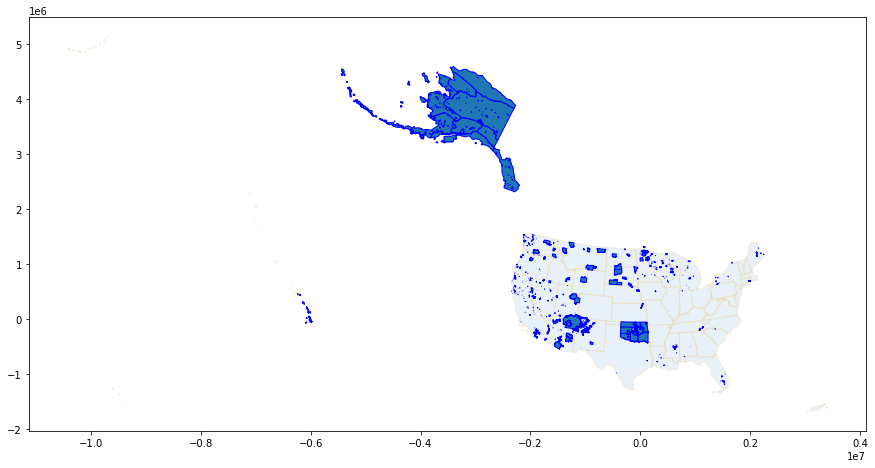

In [14]:
# test plot
ax1 = gdf.to_crs("ESRI:102003").plot(ec='blue', figsize=(15,15), zorder=1000)
US_states.to_crs("ESRI:102003").plot(ax=ax1, ec='orange', alpha=0.1, zorder=1)

In [15]:
# save composite shapefile
if not os.path.exists(os.path.join(os.getcwd(),'..','output','Tribal_Priority_2_5')):
    os.mkdir(os.path.join(os.getcwd(),'..','output','Tribal_Priority_2_5'))

gdf.to_file(os.path.join(os.getcwd(),'..','output',
                         'Tribal_Priority_2_5',
                         'Tribal_Priority_2_5_combined.shp'))
    